In [1]:
import pandas as pd
import numpy as np
# from transformers.integrations import TensorBoardCallback
# from torch.utils.tensorboard import SummaryWriter
import torch

In [10]:
!pip install huggingface
!pip install huggingface transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.3 MB/s eta 0:00:00


In [2]:
id2label = {0: "United States", 1: "United Kingdom", 2: "Canada", 3: "Australia", 4: "India", 5: "Nigeria"}
label2id = {"United States": 0, "United Kingdom": 1, "Canada": 2, "Australia": 3, "India": 4, "Nigeria": 5}

In [ ]:
df = pd.read_csv('filtered_data.csv')
df.info()

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,10,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944498 entries, 0 to 944497
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          944498 non-null  object
 1   tweet_id         944484 non-null  object
 2   tweet_text       944484 non-null  object
 3   place_id         924718 non-null  object
 4   name             924718 non-null  object
 5   full_name        924718 non-null  object
 6   country          924718 non-null  object
 7   country_code     924718 non-null  object
 8   type             924718 non-null  object
 9   username         924718 non-null  object
 10  description      791620 non-null  object
 11  user_name_field  859163 non-null  object
 12  location         801094 non-null  object
 13  withheld         51 non-null      object
 14  clean_text       857531 non-null  object
dtypes: object(15)
memory usage: 108.1+ MB


In [ ]:
country_list = ['United States', 'United Kingdom', 'Canada', 'India', 'Australia', 'Nigeria']
df= df[df['country'].isin(country_list)]
df['country'].value_counts()
df.head()

,user_id,tweet_id,tweet_text,place_id,name,full_name,country,country_code,type,username,description,user_name_field,location,withheld,clean_text
0,1051074201082388480,1637850668214960128,@Gajendr70729189 @amitsharma2704 @1shankarshar...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",NaN,Including my SAP technology business. Thank ...
1,1051074201082388480,1637818231863001090,@JatinPandyaVBNJ @1shankarsharma Indeed. Nadi...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",NaN,Indeed. Nadi Jyotish has excellent rules. N...
2,1051074201082388480,1637737394911969280,@1shankarsharma Namaste. How many years have ...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",NaN,Namaste. How many years have you spent learn...
3,1051074201082388480,1637733079002537986,An excellent example of jumping into conclusio...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",NaN,An excellent example of jumping into conclusio...
4,1051074201082388480,1637660117624836096,The want for financial security must be balanc...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",NaN,The want for financial security must be balanc...


In [ ]:
filtered_df = df[['user_id', 'tweet_id', 'tweet_text', 'country']]
filtered_df.head()
updated_df = filtered_df.astype({'user_id':np.int64, 'tweet_id': np.int64, 'tweet_text': str, 'country':str})
updated_df.to_csv('updated_df.csv')

In [ ]:
sample_df = updated_df.sample(20000, random_state = 1)
sample_df.head()
sample_df['country'] = sample_df['country'].apply(lambda x: label2id[x])
sample_df.head()

,user_id,tweet_id,tweet_text,country
810865,490104241,1637289107557879808,My aunt married a white man with the last name...,0
737537,2486046872,1635484083256979456,@GovRonDeSantis It shouldn't include theologic...,0
635983,1374446305146138626,1633236299640365057,"I had my best day ever at work, today!!!!! Fou...",0
488230,100339412,1637856072521363456,@DawiLDanger My earbuds are from Big Lots (a c...,0
659364,1488755185,1637782944667320320,@CraigAFountain Same! Thanks for having me!!!,0


In [3]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 24.8 MB/s eta 0:00:00


In [4]:
from datasets import Dataset

In [ ]:
test_size = 0.2
val_size = 0.2

y = sample_df['country']

X = sample_df

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,random_state = 630, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,random_state = 630, test_size = val_size / (1 - test_size), stratify = y_train)

In [ ]:
train, validate, test = X_train, X_val, X_test

<AxesSubplot:xlabel='country'>

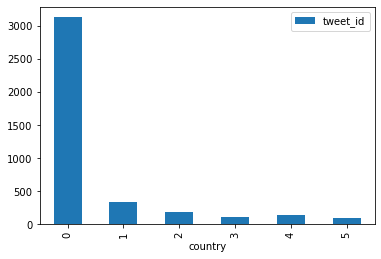

In [ ]:
validate.groupby('country').agg('count').reset_index().plot(x='country', y = 'tweet_id', kind = 'bar')

In [ ]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index = False)
validate.to_csv('validate.csv', index = False)

In [5]:
ds_train = Dataset.from_csv('train_final.csv')
ds_val = Dataset.from_csv('validate_final.csv')
ds_test = Dataset.from_csv('test_final.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c65fbf3c94de7683/0.0.0. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-28f5faab65dcf6f7/0.0.0. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-f1199241a76230ad/0.0.0. Subsequent calls will reuse this data.


In [6]:
ds = {"train": ds_train, "validation": ds_val, "test": ds_test}

In [7]:
ds_train[0]

{'user_id': 26647133,
 'tweet_id': 1623871400531443713,
 'tweet_text': 'Why is the @McDonalds app always broken? The other day it was telling me it was breakfast only at like 5pm now it’s telling me a location is closed when it’s clearly not.',
 'country': 0}

In [8]:
ds_train

Dataset({
    features: ['user_id', 'tweet_id', 'tweet_text', 'country'],
    num_rows: 12000
})

In [11]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("Twitter/twhin-bert-base", num_labels=6, id2label=id2label, label2id=label2id)

Some weights of the model checkpoint at Twitter/twhin-bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Twitter/twhin-bert-ba

In [12]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, DataCollatorWithPadding
tokenizer = AutoTokenizer.from_pretrained('Twitter/twhin-bert-base')

In [13]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

def preprocess_function(examples):
    label = examples["country"] 
    # examples['tweet_text'].apply(preprocess)
    examples = tokenizer(preprocess(examples["tweet_text"]), truncation=True, padding="max_length", max_length=256, return_tensors='pt')
    for key in examples:
        examples[key] = examples[key].squeeze(0)
    examples["label"] = label
    return examples

for split in ds:
    ds[split] = ds[split].map(preprocess_function, remove_columns=['user_id', 'tweet_id', 'tweet_text', 'country'])
    ds[split].set_format('pt')

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [14]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.0 MB/s eta 0:00:00


In [15]:
import evaluate

accuracy = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

In [16]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": accuracy.compute(predictions=predictions, references=labels), "f1":f1_metric.compute(predictions=predictions, references=labels, average="weighted")}

In [17]:
from transformers import TrainingArguments
from transformers import Trainer

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [20]:
cuda = torch.device('cuda') 

In [21]:
X_train = pd.read_csv('train_final.csv')

In [22]:
X_train

,user_id,tweet_id,tweet_text,country
0,26647133,1623871400531443713,Why is the @McDonalds app always broken? The o...,0
1,965044783826776064,1630278125182500865,bad bunny 👍🏼\nbad bunny w kendall jenner 🤮,0
2,704429918197669888,1635270090940899328,My brother said he couldn’t hang out yesterday...,0
3,1589773720490545152,1637931531346796545,@roque_coral @EltonPuka @danorlovsky7 @nosmhsn...,0
4,793170591788376064,1617327814998384641,Jeez 😳 https://t.co/VihGczzYqI,0
...,...,...,...,...
11995,50804274,1636810616274038785,@jpdef 72 days! Yes 👏🏻 https://t.co/nTlrJXGflm,0
11996,37155679,1618099056655630336,"Holey Moley, he’s still at it😀🤡 https://t.co/T...",0
11997,70847043,1628130215947010048,responding to this with “Freebird” makes you b...,0
11998,1100013571784757248,1634366554136797184,@TySunderland @verythickvajjjj And have you go...,3


In [23]:
1 / X_train['country'].value_counts(normalize=True)

0     1.276460
1    11.916584
2    22.181146
4    28.436019
3    35.190616
5    41.666667
Name: country, dtype: float64

In [24]:
class_weights = torch.FloatTensor([1.276460, 11.916584, 22.181146, 35.190616, 28.436019, 41.666667]).cuda()

In [26]:
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
class TwitterTrainerWeighted(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = criterion(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [27]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_weighted = TwitterTrainerWeighted(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics
)

trainer_weighted.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.496700,1.274963,{'accuracy': 0.6335},{'f1': 0.6788262060291769}
2,1.157200,1.293721,{'accuracy': 0.67775},{'f1': 0.7142687250813975}


Trainer is attempting to log a value of "{'accuracy': 0.6335}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.6788262060291769}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.67775}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7142687250813975}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=1500, training_loss=1.301824462890625, metrics={'train_runtime': 1275.6335, 'train_samples_per_second': 18.814, 'train_steps_per_second': 1.176, 'total_flos': 3157446057984000.0, 'train_loss': 1.301824462890625, 'epoch': 2.0})

In [28]:
predictions = trainer_weighted.predict(ds['test'])

In [29]:
labels_array = predictions[1]

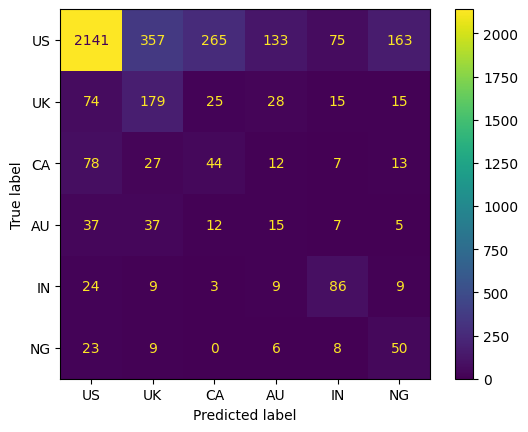

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predictions_array = np.argmax(predictions[0], axis = 1)
cm = confusion_matrix(labels_array, predictions_array)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['US', 'UK', 'CA', 'AU', 'IN', 'NG'])
cm_display.plot();

In [33]:
from sklearn.metrics import f1_score
print(f1_score(labels_array, predictions_array, average='weighted'))

0.6751382578766463


In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_array, predictions_array))

0.62875


# Without Preprocessing

In [36]:
ds_n = {"train": ds_train, "validation": ds_val, "test": ds_test}

In [38]:
def preprocess_function(examples):
    label = examples["country"] 
    # examples['tweet_text'].apply(preprocess)
    examples = tokenizer(examples["tweet_text"], truncation=True, padding="max_length", max_length=256, return_tensors='pt')
    for key in examples:
        examples[key] = examples[key].squeeze(0)
    examples["label"] = label
    return examples

for split in ds:
    ds_n[split] = ds_n[split].map(preprocess_function, remove_columns=['user_id', 'tweet_id', 'tweet_text', 'country'])
    ds_n[split].set_format('pt')

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [39]:
training_args = TrainingArguments(
    output_dir="no_pre_weighted",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_weighted_no_pre = TwitterTrainerWeighted(
    model=model,
    args=training_args,
    train_dataset=ds_n["train"],
    eval_dataset=ds_n["validation"],
    compute_metrics=compute_metrics
)

trainer_weighted_no_pre.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.103500,1.173317,{'accuracy': 0.70825},{'f1': 0.7396609754872447}
2,0.837900,1.299321,{'accuracy': 0.7075},{'f1': 0.7415208019179148}


Trainer is attempting to log a value of "{'accuracy': 0.70825}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7396609754872447}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.7075}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7415208019179148}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=1500, training_loss=0.9566855061848958, metrics={'train_runtime': 1271.6446, 'train_samples_per_second': 18.873, 'train_steps_per_second': 1.18, 'total_flos': 3157446057984000.0, 'train_loss': 0.9566855061848958, 'epoch': 2.0})

In [47]:
pred_no_pre = trainer_weighted_no_pre.predict(ds_n['test'])

In [48]:
labels_array_2 = pred_no_pre[1]

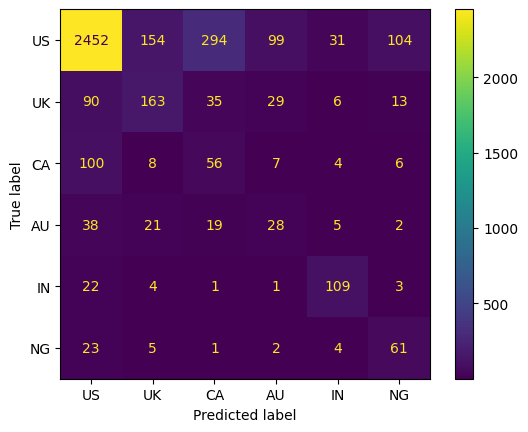

In [49]:
pred_no_pre_arr = np.argmax(pred_no_pre[0], axis = 1)
cm = confusion_matrix(labels_array_2, pred_no_pre_arr)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['US', 'UK', 'CA', 'AU', 'IN', 'NG'])
cm_display.plot();

In [50]:
print(f1_score(labels_array_2, pred_no_pre_arr, average='weighted'))

0.7455173563615857


In [51]:
print(accuracy_score(labels_array_2, pred_no_pre_arr))

0.71725
